In [ ]:
import pandas as pd

df2021 = pd.read_csv("/content/학생건강검사_2021년_원자료(극단치제거)_단위수정.csv")
df2019 = pd.read_csv("/content/2019년도 학생건강검사 원자료rawdata.csv",encoding='cp949')
df2018 = pd.read_csv("/content/2018년도 학생건강검사 원자료rawdata.csv",encoding='cp949')
# df2017 = pd.read_csv("/content/2017년도 학생건강검사 원자료_초등학교(교육부).csv",encoding='cp949')
# df2016 = pd.read_csv("/content/2016년도 학생건강검사 원자료_초등학교(교육부).csv",encoding='cp949')
# df2015 = pd.read_csv("/content/2015년도 학생건강검사 원자료_초등학교(교육부).csv",encoding='cp949')
pd.set_option('display.max_columns',None)

df2021

In [ ]:
df2019a = df2019[df2019['건강검진_종합소견'].notnull()]

for i in df2019a.columns:
  print(str(i) + " " + str(df2019a[i].isnull().sum()))

In [ ]:
def column_drop(df):
  df2 = df.drop(["개인ID","최종가중치","학교ID","도시규모","층화변수(strata)","공학여부","반","시도별","순번","생년월일","건강검진일","시력_나안_좌","시력_나안_우","시력_교정_좌","시력_교정_우",
                 "청력_좌","청력_우","기타","우식치아_개수_상","우식치아_개수_하","우식발생위험치아_개수_상","우식발생위험치아_개수_하","결손치아(영구치아)__개수_상","결손치아(영구치아)__개수_하",
                 "부정교합","구강검진일","음란물_채팅","과잉행동","주의력산만"],axis=1)
  df2 = df2.drop(["색각","호흡기","순환기","비뇨기","소화기","신경계","간염검사","그밖의치아상태","게임시간","고민상담희망"],axis=1)
  return df2

df_2019 = column_drop(df2019)
df_2018 = column_drop(df2018)
# df_2017 = column_drop(df2017)
# df_2016 = column_drop(df2016)
# df_2015 = column_drop(df2015)


df_2021 = df2021.copy()
df_2021 = df_2021.drop(['hdl','중성지방','ldl','허리둘레','음란물채팅'],axis=1)
df_2021['하루2시간이상게임'] = df_2021['하루2시간이상게임_초'].fillna(df_2021['하루2시간이상게임_중고'])
df_2021['상담희망'] = df_2021['상담희망_초'].fillna(df_2021['상담희망_중고'])
df_2021 = df_2021.drop(['하루2시간이상게임_초','상담희망_초'],axis=1)
df_2021 = df_2021.drop(['하루2시간이상게임_중고','상담희망_중고'],axis=1)

def column_rename(df):
  df.rename(columns={'도시규모별 분석용':'도시규모','광역시도':'시도','학교급별':'학교급','근골격및 척추':'척추','근골격및척추':'척추','혈당(식전)(mg_dl)':'혈당(식전)','총콜레스테롤(mg_dl)':'총콜레스테롤','알라닌아미노전이효소(ALT U_L)':'ALT','아스파테이트아미노전이효소(AST U_L)':'AST','혈색소(g_dl)':'혈색소','우식치아_유무':'충치치아_유무','우식발생위험치아_유무':'충치발생위험치아_유무','악관절이상':'턱관절이상','제3대구치':'제3대구치사랑니','1년동안치료경험':'외상치료경험','2시간이상게임':'하루2시간이상게임','가출생각중고':'가출생각_중고','괴롭힘따돌림중고':'괴롭힘따돌림_중고','상담요청중고':'상담요청_중고','괴롭힘따돌림':'괴롭힘따돌림_초','가출생각':'가출생각_초','상담요청':'상담요청_초'},inplace=True)
  return df

column_rename(df_2019)
column_rename(df_2018)
# column_rename(df_2017)
# column_rename(df_2016)
# column_rename(df_2015)
df_2021.rename(columns={'결핵흉부방사선검사':'흉부방사선검사','결손치아영구치아_유무':'결손치아(영구치아)_유무','우유유제품':'우유_유제품','하루tv시청2시간이상':'하루TV시청2시간이상','흡연음주전문가상담희망':'흡연_음주전문가상담희망','치주질환잇몸병_유무':'치주질환_유무'},inplace=True)

health_list = ['도시규모', '시도', '학교급', '학년', '성별', '키', '몸무게', '척추', '안질환', '귓병', '콧병','목병', '피부병', '요단백', '요잠혈', '혈당(식전)', '총콜레스테롤', 'AST', 'ALT', '혈색소','흉부방사선검사', '수축기', '이완기', '건강검진_종합소견']
oral_list = ['충치치아_유무', '충치발생위험치아_유무','결손치아(영구치아)_유무', '구내염및연조직질환', '구강위생상태','치주질환_유무', '치주질환_종류', '턱관절이상','치아마모증', '제3대구치사랑니', '구강검진_종합소견']
food_list = ['라면', '음료수', '패스트푸드', '육류', '우유_유제품','과일', '채소(김치제외)', '아침식사','다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3','다이어트경험_답변4']
lifestyle_list = ['주3회이상운동','하루30분이상운동', '하루수면량', '하루TV시청2시간이상', '하루2시간이상게임','자아신체상(체형)', '손씻기', '양치질']
safety_list = ['안전벨트착용','안전장비착용', '외상치료경험']
school_list = ['괴롭힘따돌림_초', '괴롭힘따돌림_중고','폭력위협','현금갈취','체벌경험','신체접촉','무기력감','수업태도교정']
home_list = ['가출생각_초','가출생각_중고','폭력위협','현금갈취','체벌경험','신체접촉', '가정문제걱정','가족흡연', '가족음주','가족지지']
consult_list = ['상담요청_초','상담요청_중고','고민상담대상','상담희망','흡연_음주전문가상담희망','성문제전문가상담희망','진로고민']

total_list = health_list + oral_list + food_list + lifestyle_list + safety_list + school_list + home_list + consult_list

df_2021 = df_2021[total_list]
df_2019 = df_2019[total_list]
df_2018 = df_2018[total_list]

In [ ]:
df_2021.columns

|2021|2019|
|-----|---|
|도시규모|도시규모별 분석용|
|시도|광역시도|
|학교급|학교급별|
|척추|근골격및척추|
|혈당(식전)|혈당(식전)(mg_dl)|
|총콜레스트롤|총콜레스테롤(mg_dl)|
|hdl||
|중성지방||
|ldl||
|AST|아스파테이트아미노전이효소(AST U_L)|
|ALT|알라닌아미노전이효소(ALT U_L)|
|혈색소|혈색소(g_dl)|
|결핵흉부방사선검사|흉부방사선검사|
|허리둘레||
|충치치아_유무|우식치아_유무|
|충치발생위험치아_유무|우식발생위험치아_유무|
|결손치아영구치아_유무|결손치아(영구치아)_유무|
|치주질환잇몸병_유무|치주질환_유무|
|턱관절이상|악관절이상|
|제3대구치사랑니|제3대구치|
|우유유제품|우유_유제품|
|주3회운동|주3회이상운동|
|외상치료경험|1년동안치료경험|
||게임시간|
|하루tv시청2시간이상|하루TV시청2시간이상|
|하루2시간이상게임_초|2시간이상게임|
|하루2시간이상게임_중고|2시간이상게임|
|괴롭힘따돌림_초||
|괴롭힘따돌림_중고|괴롭힘따돌림중고|
|가출생각_초|가출생각|
|가출생각_중고|가출생각중고|
|상담희망_초|상담희망|
|상담희망_중고|상담희망|
|흡연음주전문가상담희망|흡연_음주전문가상담희망|
|상담요청_초||
|상담요청_중고|상담요청중고|
||고민상담희망|

In [ ]:
df_2021.to_csv('/content/drive/MyDrive/2021.csv',index=False)
df_2019.to_csv('/content/drive/MyDrive/2019.csv',index=False)
df_2018.to_csv('/content/drive/MyDrive/2018.csv',index=False)

# 전처리 후

In [2]:
import pandas as pd
import numpy as np

df2021 = pd.read_csv('/content/drive/MyDrive/2021.csv')
df2019 = pd.read_csv('/content/drive/MyDrive/2019.csv')
df2018 = pd.read_csv('/content/drive/MyDrive/2018.csv')

health_list = ['도시규모', '시도', '학교급', '학년', '성별', '키', '몸무게', '척추', '안질환', '귓병', '콧병','목병', '피부병', '요단백', '요잠혈', '혈당(식전)', '총콜레스테롤', 'AST', 'ALT', '혈색소','흉부방사선검사', '수축기', '이완기', '건강검진_종합소견']
oral_list = ['충치치아_유무', '충치발생위험치아_유무','결손치아(영구치아)_유무', '구내염및연조직질환', '구강위생상태','치주질환_유무', '치주질환_종류', '턱관절이상','치아마모증', '제3대구치사랑니', '구강검진_종합소견']
food_list = ['라면', '음료수', '패스트푸드', '육류', '우유_유제품','과일', '채소(김치제외)', '아침식사','다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3','다이어트경험_답변4']
lifestyle_list = ['주3회이상운동','하루30분이상운동', '하루수면량', '하루TV시청2시간이상', '하루2시간이상게임','자아신체상(체형)', '손씻기', '양치질']
safety_list = ['안전벨트착용','안전장비착용', '외상치료경험']
school_list = ['괴롭힘따돌림_초', '괴롭힘따돌림_중고','폭력위협','현금갈취','체벌경험','신체접촉','무기력감','수업태도교정']
home_list = ['가출생각_초','가출생각_중고','폭력위협','현금갈취','체벌경험','신체접촉', '가정문제걱정','가족흡연', '가족음주','가족지지']
consult_list = ['상담요청_초','상담요청_중고','고민상담대상','상담희망','흡연_음주전문가상담희망','성문제전문가상담희망','진로고민']

<ipython-input-2-39a3551bdc2d>:4: DtypeWarning: Columns (7,8,9,10,11,12,13,14,20,23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021 = pd.read_csv('/content/drive/MyDrive/2021.csv')
<ipython-input-2-39a3551bdc2d>:6: DtypeWarning: Columns (47,48,50,51,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df2018 = pd.read_csv('/content/drive/MyDrive/2018.csv')


In [3]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97787 entries, 0 to 97786
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도시규모           97787 non-null  object 
 1   시도             97787 non-null  object 
 2   학교급            97787 non-null  object 
 3   학년             97787 non-null  int64  
 4   성별             97787 non-null  object 
 5   키              97787 non-null  float64
 6   몸무게            97787 non-null  float64
 7   척추             32230 non-null  object 
 8   안질환            32492 non-null  object 
 9   귓병             32492 non-null  object 
 10  콧병             32490 non-null  object 
 11  목병             32491 non-null  object 
 12  피부병            32491 non-null  object 
 13  요단백            32350 non-null  object 
 14  요잠혈            32338 non-null  object 
 15  혈당(식전)         5084 non-null   float64
 16  총콜레스테롤         5092 non-null   float64
 17  AST            5074 non-null   float64
 18  ALT   

In [5]:
df2018 = df2018.replace(' ',np.NAN)
df2019 = df2019.replace(' ',np.NAN)
df2021 = df2021.replace(' ',np.NAN)

df_2021 = df2021[df2021['건강검진_종합소견'].notnull()]
df_2019 = df2019[df2019['건강검진_종합소견'].notnull()]
df_2018 = df2018[df2018['건강검진_종합소견'].notnull()]

df_2018['학교급'].value_counts(dropna=False)
df_2018

,도시규모,시도,학교급,학년,성별,키,몸무게,척추,안질환,귓병,...,가족흡연,가족음주,가족지지,상담요청_초,상담요청_중고,고민상담대상,상담희망,흡연_음주전문가상담희망,성문제전문가상담희망,진로고민
0,1,서울,초,1,남,124.1,25.3,정상,없음,없음,...,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,1,서울,초,1,남,131.1,30.8,정상,없음,없음,...,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1,서울,초,1,남,121.1,27.4,정상,없음,없음,...,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,서울,초,1,남,122.1,23.1,정상,없음,없음,...,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,서울,초,1,남,120.0,20.9,정상,없음,없음,...,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107955,1,전남,고,1,남,178.0,62.0,정상,없음,없음,...,NaN,NaN,NaN,NaN,2,1,2,2,2,2
107956,1,전남,고,1,남,163.0,64.0,정상,없음,없음,...,NaN,NaN,NaN,NaN,2,1,2,2,2,2
107957,1,전남,고,1,남,166.0,63.0,정상,없음,없음,...,NaN,NaN,NaN,NaN,2,1,1,2,2,2
107958,1,전남,고,1,남,171.0,73.0,정상,없음,없음,...,NaN,NaN,NaN,NaN,2,1,2,2,2,2


1. 귓병, 콧병,목병,피부병,흉부방사선검사 > 기타?
2. 검사안함 = NAN값?
3. 보기있는거 NaN값 =


In [ ]:
def new_dataframe(df):
  a = 0
  health = df.iloc[:,a:len(health_list)]
  a += len(health_list)
  oral = df.iloc[:,a:a+len(oral_list)]
  oral.insert(0,'시도',df['시도'])
  oral.insert(1,'학교급',df['학교급'])
  oral.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+= len(oral_list)
  food = df.iloc[:,a:a+len(food_list)]
  food.insert(0,'시도',df['시도'])
  food.insert(1,'학교급',df['학교급'])
  food.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(food_list)
  lifestyle = df.iloc[:,a:a+len(lifestyle_list)]
  lifestyle.insert(0,'시도',df['시도'])
  lifestyle.insert(1,'학교급',df['학교급'])
  lifestyle.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(lifestyle_list)
  safety = df.iloc[:,a:a+len(safety_list)]
  safety.insert(0,'시도',df['시도'])
  safety.insert(1,'학교급',df['학교급'])
  safety.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(safety_list)
  school = df.iloc[:,a:a+len(school_list)]
  school.insert(0,'시도',df['시도'])
  school.insert(1,'학교급',df['학교급'])
  school.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(school_list)
  home = df.iloc[:,a:a+len(home_list)]
  home.insert(0,'시도',df['시도'])
  home.insert(1,'학교급',df['학교급'])
  home.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(home_list)
  consult = df.iloc[:,a:]
  consult.insert(0,'시도',df['시도'])
  consult.insert(1,'학교급',df['학교급'])
  consult.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  return health, oral, food, lifestyle, safety, school, home, consult


In [ ]:
health2018, oral2018, food2018, lifestyle2018, safety2018, school2018, home2018, consult2018 = new_dataframe(df_2018)
health2019, oral2019, food2019, lifestyle2019, safety2019, school2019, home2019, consult2019 = new_dataframe(df_2019)
health2021, oral2021, food2021, lifestyle2021, safety2021, school2021, home2021, consult2021 = new_dataframe(df_2021)

oral2018

,시도,학교급,건강검진_종합소견,충치치아_유무,충치발생위험치아_유무,결손치아(영구치아)_유무,구내염및연조직질환,구강위생상태,치주질환_유무,치주질환_종류,턱관절이상,치아마모증,제3대구치사랑니,구강검진_종합소견
0,서울,초,정상(경계),무,무,무,무,보통,검사안함,검사안함,검사안함,검사안함,검사안함,정상
1,서울,초,정상,무,무,무,무,개선요망,검사안함,검사안함,검사안함,검사안함,검사안함,정상(경계)
2,서울,초,정상,무,무,무,무,보통,검사안함,검사안함,검사안함,검사안함,검사안함,정상
3,서울,초,정상,유,무,무,무,개선요망,검사안함,검사안함,검사안함,검사안함,검사안함,정밀검사요함
4,서울,초,정상(경계),유,무,무,무,개선요망,검사안함,검사안함,검사안함,검사안함,검사안함,정밀검사요함
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107955,전남,고,정상,무,무,무,무,보통,무,NaN,무,무,정상,정밀검사요함
107956,전남,고,정상,유,무,무,무,보통,무,NaN,무,무,정상,정밀검사요함
107957,전남,고,정밀검사요함,유,무,무,무,보통,무,NaN,무,무,정상,정밀검사요함
107958,전남,고,정상,유,무,무,무,보통,유,치은출혈/비대,무,무,정상,정밀검사요함


In [ ]:
def new_dataframe(df):
  a = 0
  health = df.iloc[:,a:len(health_list)]
  a += len(health_list)
  oral = df.iloc[:,a:a+len(oral_list)]
  oral.insert(0,'시도',df['시도'])
  oral.insert(1,'학교급',df['학교급'])
  oral.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+= len(oral_list)
  food = df.iloc[:,a:a+len(food_list)]
  food.insert(0,'시도',df['시도'])
  food.insert(1,'학교급',df['학교급'])
  food.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(food_list)
  lifestyle = df.iloc[:,a:a+len(lifestyle_list)]
  lifestyle.insert(0,'시도',df['시도'])
  lifestyle.insert(1,'학교급',df['학교급'])
  lifestyle.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(lifestyle_list)
  safety = df.iloc[:,a:a+len(safety_list)]
  safety.insert(0,'시도',df['시도'])
  safety.insert(1,'학교급',df['학교급'])
  safety.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(safety_list)
  school = df.iloc[:,a:a+len(school_list)]
  school.insert(0,'시도',df['시도'])
  school.insert(1,'학교급',df['학교급'])
  school.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(school_list)
  home = df.iloc[:,a:a+len(home_list)]
  home.insert(0,'시도',df['시도'])
  home.insert(1,'학교급',df['학교급'])
  home.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  a+=len(home_list)
  consult = df.iloc[:,a:]
  consult.insert(0,'시도',df['시도'])
  consult.insert(1,'학교급',df['학교급'])
  consult.insert(2,'건강검진_종합소견',df['건강검진_종합소견'])
  return health, oral, food, lifestyle, safety, school, home, consult

def column_grade(df):
  dfa = df[df['학교급']=='초']
  dfb = df[df['학교급']!='초']
  return dfa, dfb

결측치의 기준이 학교급이라고 생각함
( 초등학생을 대상으로 한 설문, 중고등학생을 대상으로한 설문으로 나뉨 )
따라서 결측치 확인은 학교 급으로 우선 나누는게 좋아보인다

In [ ]:
oral2018a, oral2018b = column_grade(oral2018)
oral2019a, oral2019b = column_grade(oral2019)
oral2021a, oral2021b = column_grade(oral2021)

In [ ]:
oral2021 = oral2021[oral2021['구강검진_종합소견'].notnull()]
oral2021.info()

oral2021a = oral2021[oral2021['학교급']=='초']
oral2021b = oral2021[(oral2021['학교급']!='초')]
oral2021a.info()
oral2021b.info()

# oral2019a = oral2019[oral2019['구강검진_종합소견'].notnull()]
# oral2019.info()
# oral2019a.info()
# oral2018a = oral2018[oral2018['구강검진_종합소견'].notnull()]
# oral2018.info()
# oral2018a.info()
# oral2018a['학교급'].value_counts()

In [ ]:
food2021a, food2021b = column_grade(food2021)
food2021['다이어트경험_답변1'] = food2021['다이어트경험_답변1'].fillna(0)
food2021.drop(['다이어트경험_답변2','다이어트경험_답변3','다이어트경험_답변4'],axis=1,inplace=True)
# 1:다이어트경험 없다 0:다이어트경험 있다


# food2021.info()
# food2019.info()
# food2018.info()
# food2021['건강검진_종합소견'] = df_2021['건강검진_종합소견']

In [ ]:
food2021a = pd.get_dummies(food2021c)
food2021a

In [ ]:
lifestyle2021.info()
# lifestyle2019.info()
# lifestyle2018.info()


lifestyle2021[lifestyle2021['하루30분이상운동'].notnull()].info()
lifestyle2021[lifestyle2021['하루TV시청2시간이상'].notnull()].info()
# lifestyle2021['하루TV시청2시간이상'].value_counts()
# # 4 오류 1 예 2 아니요
# lifestyle2021['주3회이상운동'].value_counts()
# # 3,4 오류 1 예 2 아니오


In [ ]:
safety2021['학교급'] = df_2021['학교급']

safety2021.info()
safety2019.info()
safety2018.info()

safety2021['외상치료경험'].value_counts()
# 1 없음 2 1번 3 2번 4 3번이상
# safety2021.corr()
# 중고등학생 대상임

In [ ]:
# school2021.info()
# school2019.info()
# school2018.info()

# school2021[school2021['괴롭힘따돌림_초'].notnull()].info()
# school2021[school2021['괴롭힘따돌림_중고'].notnull()].info()


# 중고등학생
# 괴롭힘따돌림_중고 폭력위협
# 초등학생
# 괴롭힘따돌림_초 현금갈취 체벌경험 신체접촉 무기력감 수업태도교정

school2018a, school2018b = column_grade(school2018)
school2018b = school2018b[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_중고','폭력위협']]
school2018a = school2018a[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_초','현금갈취','체벌경험','신체접촉','무기력감','수업태도교정']]
school2019a, school2019b = column_grade(school2019)
school2019b = school2019b[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_중고','폭력위협']]
school2019a = school2019a[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_초','현금갈취','체벌경험','신체접촉','무기력감','수업태도교정']]
school2021a, school2021b = column_grade(school2021)
school2021b = school2021b[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_중고','폭력위협']]
school2021a = school2021a[['시도','학교급','건강검진_종합소견','괴롭힘따돌림_초','현금갈취','체벌경험','신체접촉','무기력감','수업태도교정']]
school2019b

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_중고,폭력위협
0,강원,고,정상,2.0,2.0
1,강원,고,정상,2.0,2.0
2,강원,고,정상(경계),2.0,2.0
3,강원,고,정밀검사요함,2.0,2.0
4,강원,고,정밀검사요함,2.0,2.0
...,...,...,...,...,...
104249,충북,고,정상,2.0,2.0
104250,충북,고,정상,2.0,2.0
104251,충북,고,정상,2.0,2.0
104252,충북,고,정상,2.0,2.0


In [ ]:
# home2021.info()
# home2019.info()
# home2018.info()

home2018a, home2018b = column_grade(home2018)
home2018b = home2018b[['가출생각_중고','가정문제걱정']]
home2018a = home2018a[['가출생각_초', '가족흡연', '가족음주', '가족지지']]
home2019a, home2019b = column_grade(home2019)
home2019b = home2019b[['가출생각_중고','가정문제걱정']]
home2019a = home2019a[['가출생각_초', '가족흡연', '가족음주', '가족지지']]
home2021a, home2021b = column_grade(home2021)
home2021b = home2021b[['가출생각_중고','가정문제걱정']]
home2021a = home2021a[['가출생각_초', '가족흡연', '가족음주', '가족지지']]
home2018a

# 중고등학생
# 가출생각_중고 폭력위협 가정문제 걱정
# 초등학생
# 가출생각_초, 가족흡연, 가족음주, 가족지지

,가출생각_초,가족흡연,가족음주,가족지지
0,2,2,2,1
1,2,1,1,1
2,2,2,2,1
3,2,2,2,1
4,2,2,2,1
...,...,...,...,...
107478,2.0,2.0,2.0,1.0
107479,2.0,2.0,2.0,1.0
107480,2.0,1.0,1.0,1.0
107481,2.0,2.0,2.0,1.0


In [ ]:
consult2018a, consult2018b = column_grade(consult2018)
consult2018b = consult2018b[['상담요청_중고', '고민상담대상', '상담희망', '흡연_음주전문가상담희망', '성문제전문가상담희망', '진로고민']]
consult2018a = consult2018a[['상담요청_초']]
consult2019a, consult2019b = column_grade(consult2019)
consult2019b = consult2019b[['상담요청_중고', '고민상담대상', '상담희망', '흡연_음주전문가상담희망', '성문제전문가상담희망', '진로고민']]
consult2019a = consult2019a[['상담요청_초']]
consult2021a, consult2021b = column_grade(consult2021)
consult2021b = consult2021b[['상담요청_중고', '고민상담대상', '상담희망', '흡연_음주전문가상담희망', '성문제전문가상담희망', '진로고민']]
consult2021a = consult2021a[['상담요청_초']]

In [ ]:
def new_dataframe(schoola, homea, consulta, schoolb, homeb, consultb):
  elementary = pd.concat([schoola,homea],axis=1)
  mid_high = pd.concat([schoolb,homeb],axis=1)

  elementary_consult = pd.concat([elementary,consulta],axis=1)
  mid_high_consult = pd.concat([mid_high,consultb],axis=1)

  columns_to_convert_e = elementary_consult.columns.difference(['시도','학교급','건강검진_종합소견'])
  columns_to_convert_mh = mid_high_consult.columns.difference(['시도','학교급','건강검진_종합소견'])

  elementary_consult.dropna(inplace=True)
  mid_high_consult.dropna(inplace=True)

  elementary_consult[columns_to_convert_e] = elementary_consult[columns_to_convert_e].astype(int)
  mid_high_consult[columns_to_convert_mh] = mid_high_consult[columns_to_convert_mh].astype(int)
  return elementary_consult, mid_high_consult

elementary2018, mid_high2018 = new_dataframe(school2018a, home2018a, consult2018a, school2018b, home2018b, consult2018b)
elementary2019, mid_high2019 = new_dataframe(school2019a, home2019a, consult2019a, school2019b, home2019b, consult2019b)
elementary2021, mid_high2021 = new_dataframe(school2021a, home2021a, consult2021a, school2021b, home2021b, consult2021b)



elementary2018
mid_high2021
# elementary = pd.get_dummies(elementary)
# mid_high = pd.get_dummies(mid_high)

# elementary.corr()
# mid_high.corr()

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_중고,폭력위협,가출생각_중고,가정문제걱정,상담요청_중고,고민상담대상,상담희망,흡연_음주전문가상담희망,성문제전문가상담희망,진로고민
38448,경기,중,정상,2,2,2,2,2,1,2,2,2,2
38449,경기,중,정밀검사요함,2,2,2,2,2,1,2,2,2,1
38450,충남,중,정상(경계),2,2,2,2,2,1,2,2,2,2
38451,충남,중,정상(경계),2,2,2,2,2,1,2,2,2,2
38452,경기,중,정밀검사요함,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77581,울산,고,정밀검사요함,2,2,2,2,2,1,2,2,2,2
77582,충남,고,정상,2,2,2,2,2,1,2,2,2,1
77583,인천,고,정밀검사요함,2,2,2,2,2,2,2,2,2,2
77584,충남,고,정상,2,2,2,2,2,1,2,2,2,2


In [ ]:
# consult2021.info()
# consult2019.info()
# consult2018.info()

consult2018a, consult2018b = column_grade(consult2018)
consult2018b = consult2018b[['상담요청_중고', '고민상담대상', '상담희망', '흡연_음주전문가상담희망', '성문제전문가상담희망', '진로고민']]
consult2018a = consult2018a[['상담요청_초']]

# elementary_consult = pd.concat([elementary2,consult2018a],axis=1)
# mid_high_consult = pd.concat([mid_high2,consult2018b],axis=1)

# elementary_consult.dropna(inplace=True)
# mid_high_consult.dropna(inplace=True)

# columns_to_convert_e = elementary_consult.columns.difference(['학교급','건강검진_종합소견'])
# columns_to_convert_mh = mid_high_consult.columns.difference(['학교급','건강검진_종합소견'])

# elementary_consult[columns_to_convert_e] = elementary_consult[columns_to_convert_e].astype(int)
# mid_high_consult[columns_to_convert_mh] = mid_high_consult[columns_to_convert_mh].astype(int)

elementary_consult = pd.get_dummies(elementary_consult)
mid_high_consult = pd.get_dummies(mid_high_consult)

# elementary_consult
# elementary_consult.corr()
mid_high_consult.corr()

# 중고등학생
# 상담요청_중고, 고민상담대상, 상담희망, 흡연_음주전문가상담희망, 성문제전문가상담희망, 진로고민
# 초등학생
# 상담요청_초, 상담희망

NameError: name 'elementary2' is not defined

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

df2 = pd.read_csv('/content/drive/MyDrive/student_info2.csv')
df2.info()

<ipython-input-16-26609ef04950>:10: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/student_info2.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101245 entries, 0 to 101244
Data columns (total 77 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   학년             101245 non-null  float64
 1   음료수            101245 non-null  float64
 2   총콜레스테롤         101245 non-null  float64
 3   흡연_음주전문가상담희망   101245 non-null  float64
 4   년도             101245 non-null  float64
 5   우유_유제품         101245 non-null  float64
 6   치주질환_유무        91784 non-null   object 
 7   요잠혈            101077 non-null  object 
 8   구강검진_종합소견      100219 non-null  object 
 9   턱관절이상          91444 non-null   object 
 10  흉부방사선검사        63151 non-null   object 
 11  무기력감           101245 non-null  float64
 12  하루30분이상운동      101245 non-null  float64
 13  목병             101184 non-null  object 
 14  가족흡연           101245 non-null  float64
 15  AST            101245 non-null  float64
 16  수축기            101245 non-null  float64
 17  아침식사           101245 non-nul

In [ ]:
dfa, dfb = column_grade(df2)


col_e_list = ['시도','학교급', '건강검진_종합소견', '괴롭힘따돌림_초', '현금갈취', '체벌경험', '신체접촉', '무기력감', '수업태도교정', '가출생각_초', '가족흡연', '가족음주', '가족지지', '상담요청_초']
col_mh_list = ['시도','학교급', '건강검진_종합소견', '괴롭힘따돌림_중고', '폭력위협', '가출생각_중고', '가정문제걱정', '상담요청_중고', '고민상담대상', '상담희망', '흡연_음주전문가상담희망', '성문제전문가상담희망', '진로고민']
elementary = dfa[col_e_list]
mid_high = dfb[col_mh_list]

# elementary
# mid_high

columns_to_convert_e = elementary.columns.difference(['시도','학교급','건강검진_종합소견'])
columns_to_convert_mh = mid_high.columns.difference(['시도','학교급','건강검진_종합소견'])

elementary[columns_to_convert_e] = elementary[columns_to_convert_e].astype(int)
mid_high[columns_to_convert_mh] = mid_high[columns_to_convert_mh].astype(int)

elementary

<ipython-input-17-d1991cd9ecb6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elementary[columns_to_convert_e] = elementary[columns_to_convert_e].astype(int)
<ipython-input-17-d1991cd9ecb6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_high[columns_to_convert_mh] = mid_high[columns_to_convert_mh].astype(int)


,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
0,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
2,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
3,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
4,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81475,부산,초,정상,2,2,2,2,2,2,2,2,2,1,2
81476,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
81477,세종,초,정상,1,2,2,2,2,2,2,2,2,1,2
81478,대구,초,정밀검사요함,0,0,0,0,0,0,0,0,0,0,0


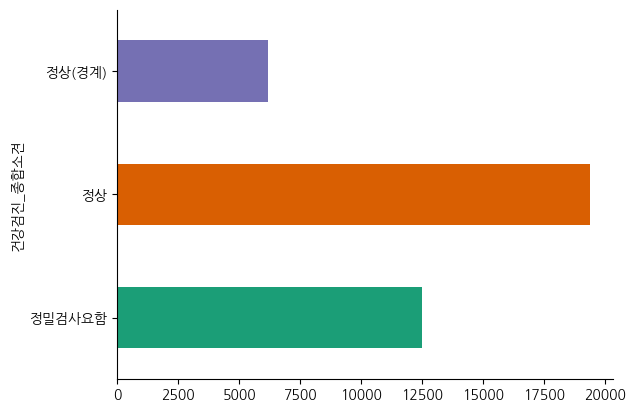

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
elementary.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(elementary['건강검진_종합소견'].value_counts())
mid_high['건강검진_종합소견'].value_counts()

정상        19378
정밀검사요함    12497
정상(경계)     6190
Name: 건강검진_종합소견, dtype: int64


정밀검사요함    26891
정상        26307
정상(경계)     9982
Name: 건강검진_종합소견, dtype: int64

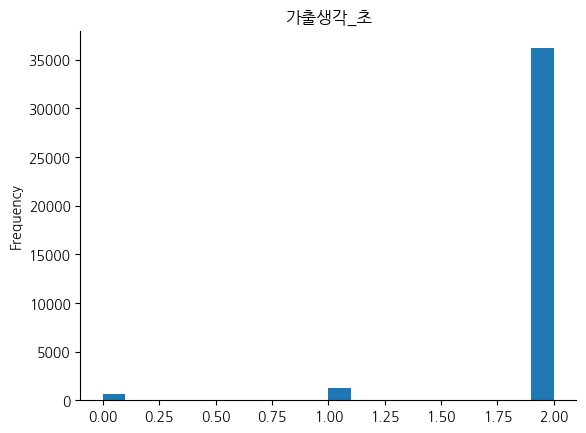

In [ ]:
from matplotlib import pyplot as plt
elementary['가출생각_초'].plot(kind='hist', bins=20, title='가출생각_초')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
elementary['체벌경험'].plot(kind='hist', bins=20, title='체벌경험')
plt.gca().spines[['top', 'right',]].set_visible(False)

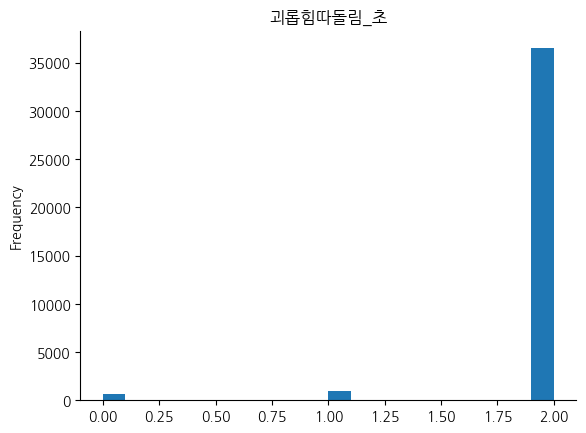

In [ ]:
from matplotlib import pyplot as plt
elementary['괴롭힘따돌림_초'].plot(kind='hist', bins=20, title='괴롭힘따돌림_초')
plt.gca().spines[['top', 'right',]].set_visible(False)

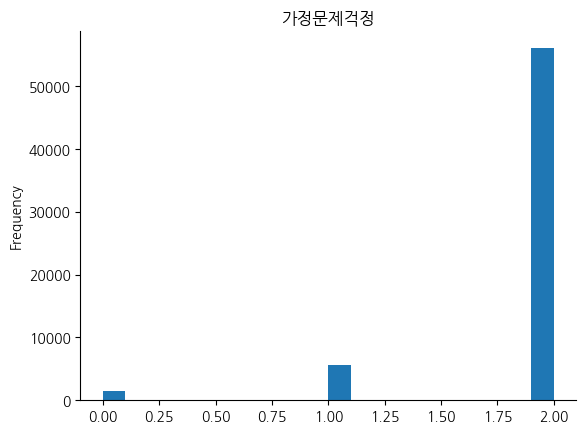

In [ ]:
from matplotlib import pyplot as plt
mid_high['가정문제걱정'].plot(kind='hist', bins=20, title='가정문제걱정')
plt.gca().spines[['top', 'right',]].set_visible(False)

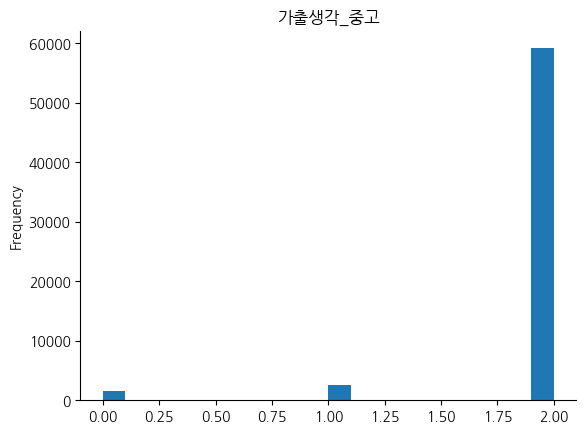

In [ ]:
from matplotlib import pyplot as plt
mid_high['가출생각_중고'].plot(kind='hist', bins=20, title='가출생각_중고')
plt.gca().spines[['top', 'right',]].set_visible(False)

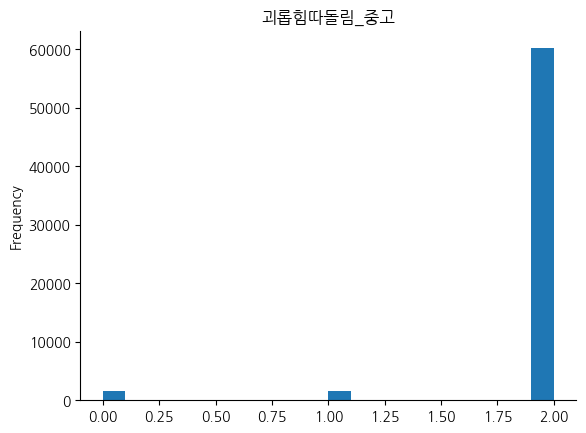

In [ ]:
from matplotlib import pyplot as plt
mid_high['괴롭힘따돌림_중고'].plot(kind='hist', bins=20, title='괴롭힘따돌림_중고')
plt.gca().spines[['top', 'right',]].set_visible(False)

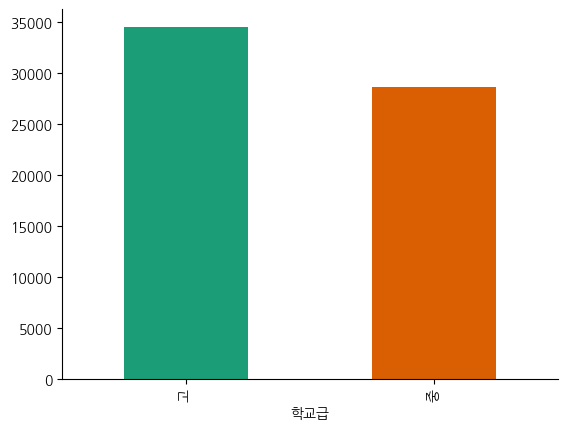

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
mid_high.groupby('학교급').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

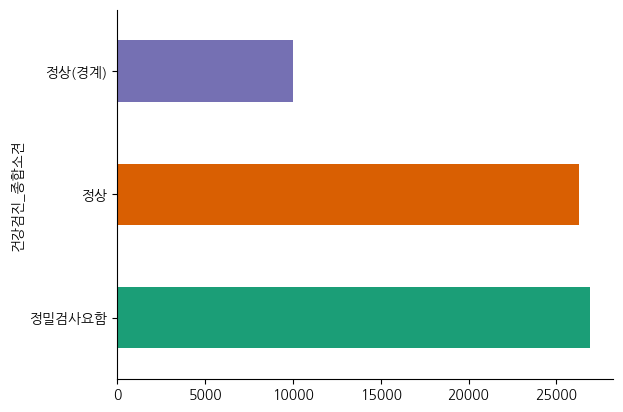

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
mid_high.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
elementary[elementary['건강검진_종합소견']=='정밀검사요함']
elementary[elementary['건강검진_종합소견']=='정상(경계)']
# elementary[elementary['건강검진_종합소견']=='정상']

mid_high[mid_high['건강검진_종합소견']=='정밀검사요함']
# mid_high[mid_high['건강검진_종합소견']=='정상(경계)']
# mid_high[mid_high['건강검진_종합소견']=='정상']

mid_high2 = pd.get_dummies(mid_high,drop_first=True)


e_bully = elementary[elementary['괴롭힘따돌림_초']==1]
e_bully2 = pd.get_dummies(e_bully,drop_first=True)
e_bully2.corr()

,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초,건강검진_종합소견_정상,건강검진_종합소견_정상(경계)
괴롭힘따돌림_초,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
현금갈취,NaN,1.000000,0.115455,0.360519,0.065344,0.014344,0.222447,0.034149,0.047355,0.021929,0.090250,-0.019258,0.048743
체벌경험,NaN,0.115455,1.000000,0.071030,0.203354,0.020995,0.140831,-0.109540,0.234128,-0.401140,0.035215,0.034181,0.005145
신체접촉,NaN,0.360519,0.071030,1.000000,0.136494,0.073351,0.282547,0.054455,0.045128,0.022521,0.103759,0.031319,0.012146
무기력감,NaN,0.065344,0.203354,0.136494,1.000000,0.142991,0.337960,0.031630,0.139273,-0.250363,0.190160,0.030737,0.029774
수업태도교정,NaN,0.014344,0.020995,0.073351,0.142991,1.000000,0.123137,0.065671,0.071240,-0.025493,0.115520,0.041479,0.003793
가출생각_초,NaN,0.222447,0.140831,0.282547,0.337960,0.123137,1.000000,0.120663,0.099382,-0.098208,0.187214,0.036138,-0.010594
가족흡연,NaN,0.034149,-0.109540,0.054455,0.031630,0.065671,0.120663,1.000000,0.188123,0.120672,0.046788,0.023672,-0.036177
가족음주,NaN,0.047355,0.234128,0.045128,0.139273,0.071240,0.099382,0.188123,1.000000,-0.211441,0.116746,0.009050,-0.055278
가족지지,NaN,0.021929,-0.401140,0.022521,-0.250363,-0.025493,-0.098208,0.120672,-0.211441,1.000000,-0.000125,-0.042677,-0.069918


In [ ]:
def column_check(df, col):
  if col == '건강검진_종합소견':
    df_normal = df[df[col]=='정상']
    df_warning = df[df[col]=='정상(경계)']
    df_bad = df[df[col]=='정밀검사요함']
    return df_normal, df_warning, df_bad
  if col == '학교급':
    df_mid = df[df[col]=='중']
    df_high = df[df[col]=='고']
    return df_mid, df_high
  df_yes = df[df[col]==1]
  df_no = df[df[col]==2]
  return df_yes, df_no

# a, b, c = column_check(mid_high2021,'건강검진_종합소견')

# 초등학생

In [ ]:
elementary, elementary2018, elementary2019,
elementary2021
# 38065, 12822, 12558, 11922

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
0,충북,초,정상,2,2,2,2,2,2,2,1,2,1,2
1,대전,초,정상,2,2,2,2,2,2,2,2,2,1,2
2,제주,초,정상(경계),2,2,2,2,2,2,2,1,2,1,2
3,세종,초,정상,2,2,2,2,2,2,2,2,2,1,2
4,전북,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25680,경기,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
25682,부산,초,정상,2,2,2,2,2,2,2,2,2,1,2
25683,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
25684,세종,초,정상,1,2,2,2,2,2,2,2,2,1,2


#### 각 칼럼별로 데이터를 나눈 다음 건강검진_종합소견을 보자

## 1. 괴롭힘따돌림_초

In [ ]:
a, b = column_check(elementary,'괴롭힘따돌림_초')
# a
b
# 951 / 36509

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
0,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
2,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
3,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
4,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81473,광주,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
81474,경기,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
81475,부산,초,정상,2,2,2,2,2,2,2,2,2,1,2
81476,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2


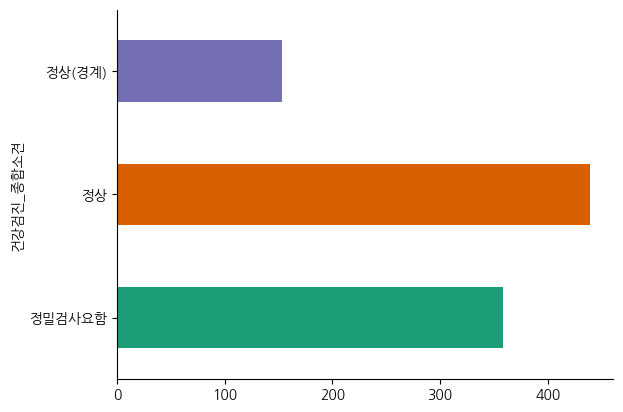

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

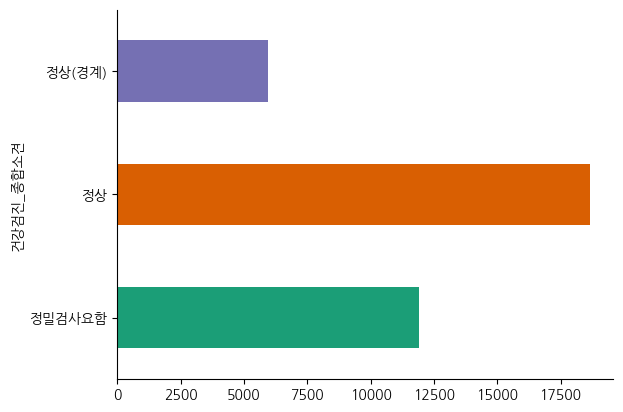

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 2.현금갈취

In [ ]:
a, b = column_check(elementary,'현금갈취')
a
# b
# 139 37322

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
30,서울,초,정상,2,1,2,2,2,2,2,2,1,1,2
48,서울,초,정밀검사요함,1,1,2,2,2,2,2,2,2,1,2
56,서울,초,정상,2,1,2,2,2,2,2,2,2,1,2
226,서울,초,정상(경계),2,1,1,2,2,2,2,1,2,2,2
247,서울,초,정상,1,1,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80128,경남,초,정밀검사요함,2,1,2,2,2,2,2,2,2,1,2
80211,서울,초,정밀검사요함,2,1,2,2,2,2,2,1,1,1,2
80836,경북,초,정상,1,1,2,2,2,2,2,1,2,1,2
81248,경기,초,정상,2,1,2,2,2,2,2,1,1,1,2


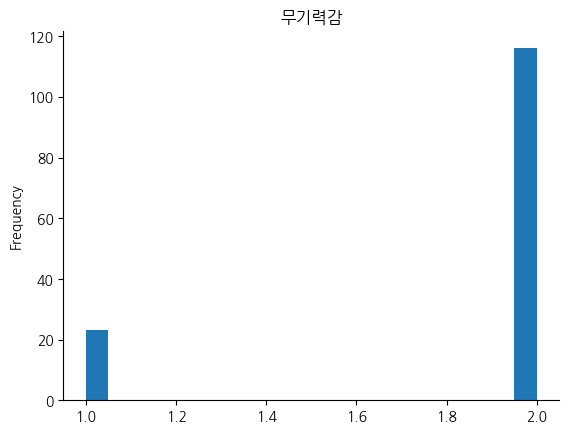

In [ ]:
# @title 무기력감

from matplotlib import pyplot as plt
a['무기력감'].plot(kind='hist', bins=20, title='무기력감')
plt.gca().spines[['top', 'right',]].set_visible(False)

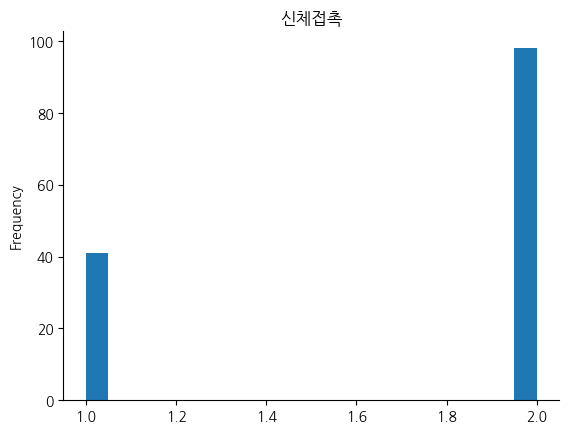

In [ ]:
# @title 신체접촉

from matplotlib import pyplot as plt
a['신체접촉'].plot(kind='hist', bins=20, title='신체접촉')
plt.gca().spines[['top', 'right',]].set_visible(False)

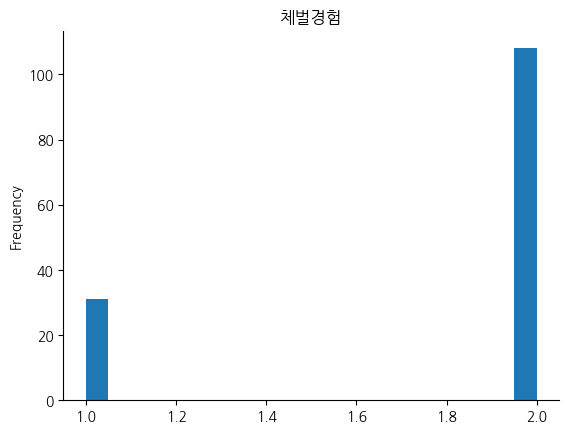

In [ ]:
# @title 체벌경험

from matplotlib import pyplot as plt
a['체벌경험'].plot(kind='hist', bins=20, title='체벌경험')
plt.gca().spines[['top', 'right',]].set_visible(False)

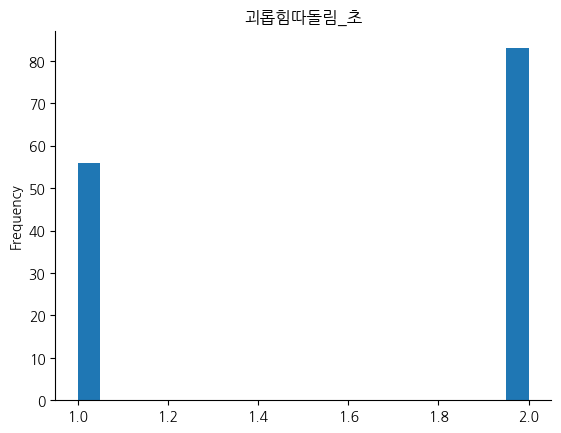

In [ ]:
# @title 괴롭힘따돌림_초

from matplotlib import pyplot as plt
a['괴롭힘따돌림_초'].plot(kind='hist', bins=20, title='괴롭힘따돌림_초')
plt.gca().spines[['top', 'right',]].set_visible(False)

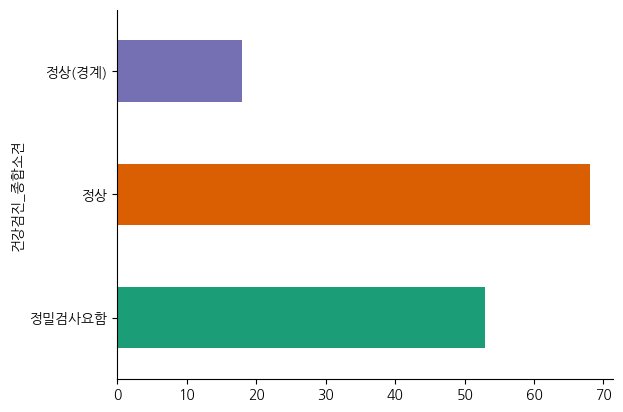

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

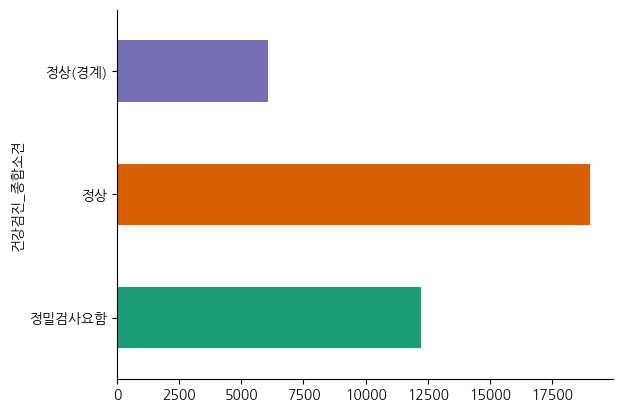

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 3. 체벌경험

In [ ]:
a, b = column_check(elementary,'체벌경험')
a
# b
# 813 36647

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
17,서울,초,정밀검사요함,1,2,1,2,1,1,1,1,1,2,1
82,서울,초,정밀검사요함,1,2,1,2,2,2,2,2,2,1,1
83,서울,초,정상,2,2,1,2,1,1,2,2,2,1,2
171,서울,초,정상(경계),1,2,1,1,1,2,1,2,2,1,2
191,서울,초,정상(경계),1,2,1,2,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81260,대전,초,정상,1,2,1,2,2,2,2,2,2,2,2
81363,경기,초,정밀검사요함,2,2,1,2,2,2,2,1,1,2,2
81388,대전,초,정밀검사요함,1,2,1,2,1,2,2,2,1,2,2
81422,경기,초,정밀검사요함,2,2,1,2,2,2,2,2,2,2,2


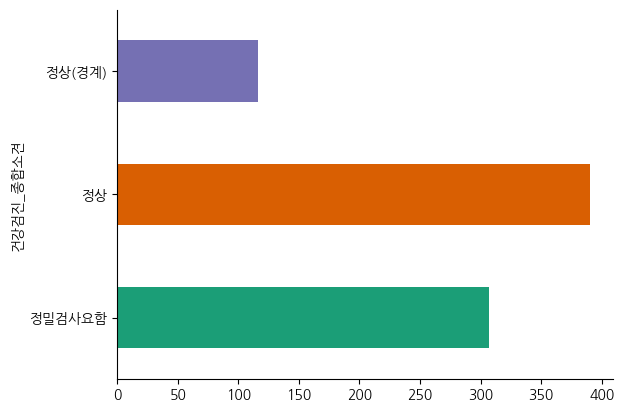

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

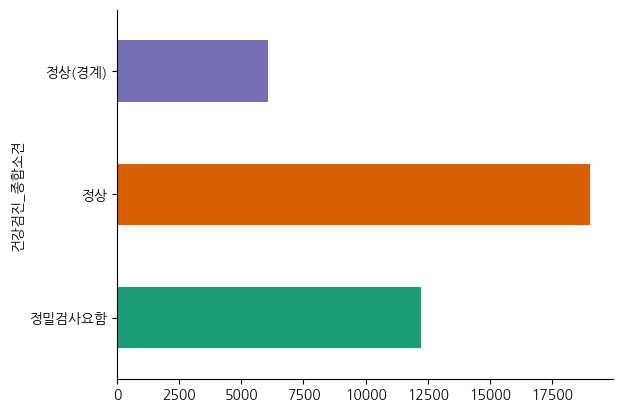

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 4. 신체접촉

In [ ]:
a, b = column_check(elementary,'신체접촉')
# a
b
# 327 37134

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
0,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
2,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
3,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
4,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81474,경기,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
81475,부산,초,정상,2,2,2,2,2,2,2,2,2,1,2
81476,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
81477,세종,초,정상,1,2,2,2,2,2,2,2,2,1,2


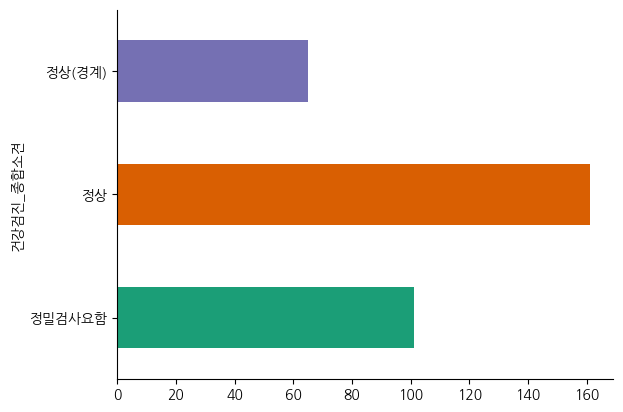

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 5. 무기력감

In [ ]:
a, b = column_check(elementary,'무기력감')
a
# b
# 617 36844

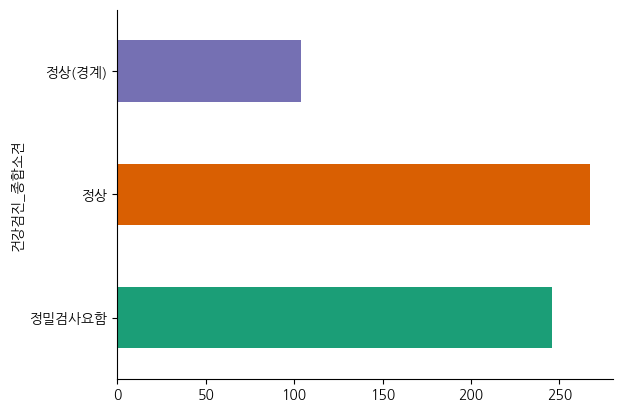

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

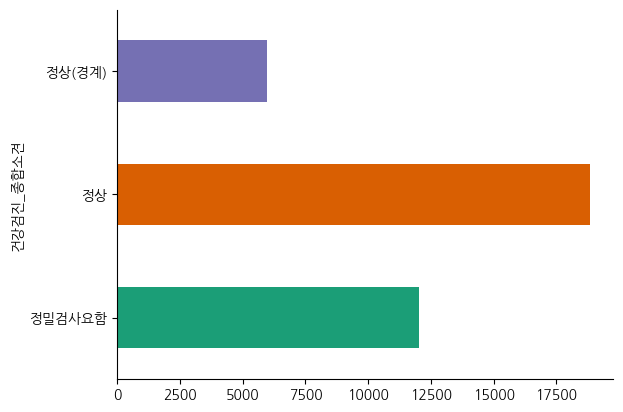

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 6. 수업태도교정

In [ ]:
a, b = column_check(elementary,'수업태도교정')
a
# b
# 1121 36183

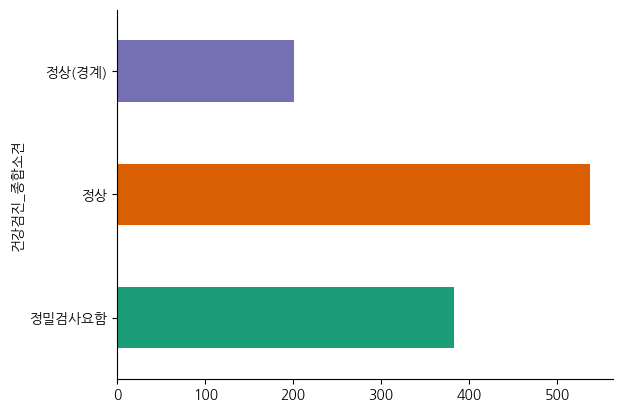

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

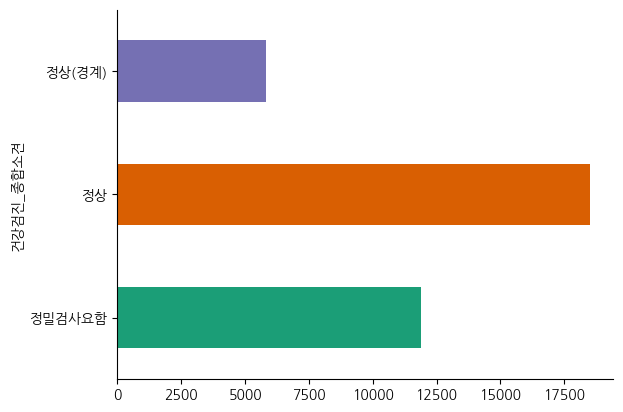

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 7. 가출생각_초

In [ ]:
a, b = column_check(elementary,'가출생각_초')
a
# b
# 1283 36178

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
17,서울,초,정밀검사요함,1,2,1,2,1,1,1,1,1,2,1
26,서울,초,정밀검사요함,2,2,2,2,2,2,1,1,1,2,2
31,서울,초,정상,2,2,2,2,2,2,1,2,1,2,2
80,서울,초,정상,2,2,2,2,2,2,1,2,2,1,2
85,서울,초,정상,2,2,2,2,2,2,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81360,제주,초,정밀검사요함,2,2,2,2,2,2,1,1,2,1,2
81379,경기,초,정밀검사요함,2,1,2,1,2,2,1,2,2,1,2
81402,전북,초,정밀검사요함,2,2,2,2,2,2,1,2,2,1,1
81410,서울,초,정상,2,2,2,2,2,2,1,2,2,1,2


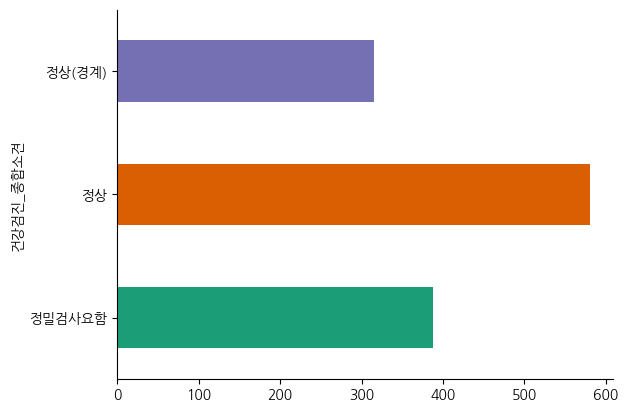

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

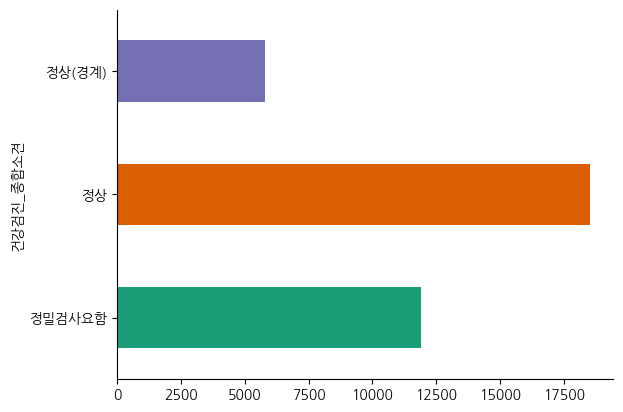

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 8. 가족흡연

In [ ]:
a, b = column_check(elementary,'가족흡연')
a
# b
# 13903 23558

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
5,서울,초,정상(경계),2,2,2,2,2,2,2,1,2,1,2
8,서울,초,정상,2,2,2,2,2,2,2,1,2,1,2
10,서울,초,정상(경계),2,2,2,2,1,2,2,1,1,1,2
13,서울,초,정상(경계),1,2,2,2,2,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,경기,초,정상,2,2,2,2,2,2,2,1,2,1,2
81464,부산,초,정밀검사요함,2,2,2,2,2,2,2,1,2,1,2
81465,서울,초,정밀검사요함,2,2,2,2,2,1,2,1,1,1,2
81467,충남,초,정상,2,2,2,2,2,2,2,1,1,1,2


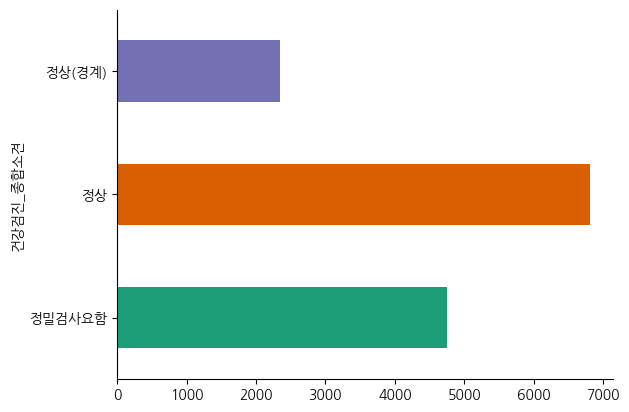

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

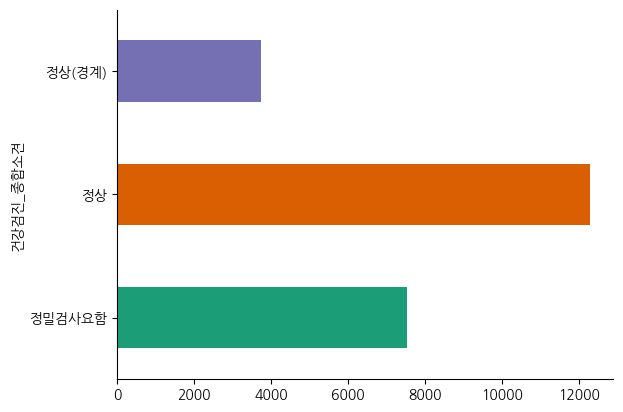

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 9. 가족음주

In [ ]:
a, b = column_check(elementary,'가족음주')
a
# b
# 4710 32751

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
10,서울,초,정상(경계),2,2,2,2,1,2,2,1,1,1,2
13,서울,초,정상(경계),1,2,2,2,2,2,2,1,1,1,2
17,서울,초,정밀검사요함,1,2,1,2,1,1,1,1,1,2,1
23,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81453,울산,초,정상,2,2,2,2,2,2,2,2,1,1,2
81456,부산,초,정상(경계),2,2,2,2,2,2,2,2,1,1,2
81458,전남,초,정상,2,2,2,2,2,2,2,1,1,1,2
81465,서울,초,정밀검사요함,2,2,2,2,2,1,2,1,1,1,2


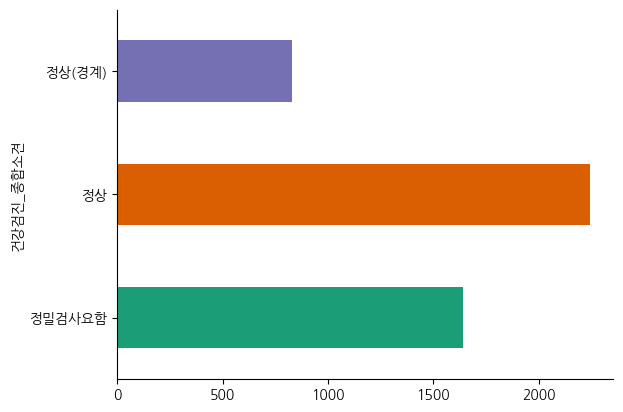

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

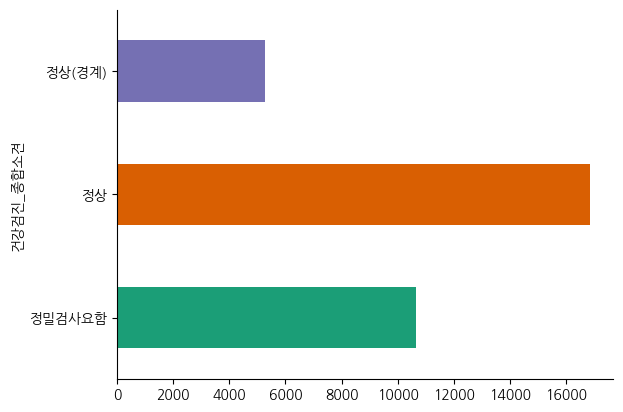

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 10. 가족지지

In [ ]:
a, b = column_check(elementary,'가족지지')
a
# b
# 33560 3899

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
0,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
1,서울,초,정상,2,2,2,2,2,2,2,1,1,1,2
2,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
3,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
4,서울,초,정상(경계),2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81474,경기,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,2
81475,부산,초,정상,2,2,2,2,2,2,2,2,2,1,2
81476,서울,초,정상,2,2,2,2,2,2,2,2,2,1,2
81477,세종,초,정상,1,2,2,2,2,2,2,2,2,1,2


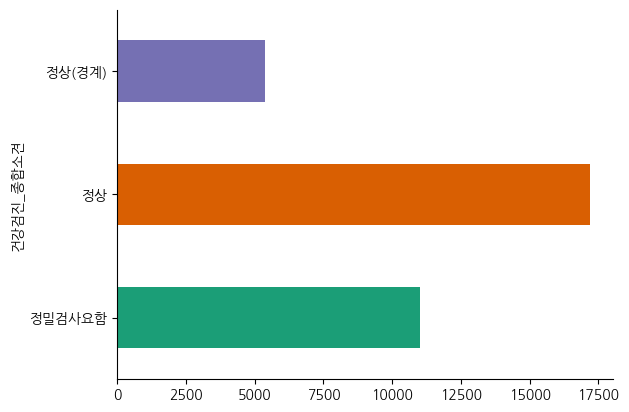

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

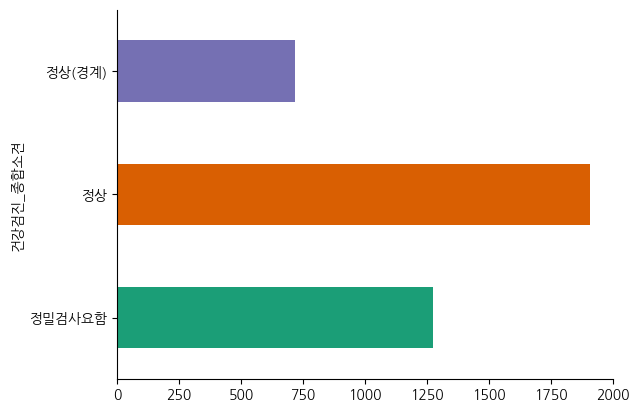

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 11. 상담요청_초

In [ ]:
a, b = column_check(elementary,'상담요청_초')
a
# b
# 799 36658

,시도,학교급,건강검진_종합소견,괴롭힘따돌림_초,현금갈취,체벌경험,신체접촉,무기력감,수업태도교정,가출생각_초,가족흡연,가족음주,가족지지,상담요청_초
17,서울,초,정밀검사요함,1,2,1,2,1,1,1,1,1,2,1
28,서울,초,정상,2,2,2,1,2,2,2,2,2,2,1
34,서울,초,정밀검사요함,2,2,2,2,2,2,2,2,2,1,1
51,서울,초,정상(경계),1,2,2,2,2,1,2,1,1,1,1
82,서울,초,정밀검사요함,1,2,1,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81386,전남,초,정상,2,2,2,2,2,2,2,1,2,1,1
81402,전북,초,정밀검사요함,2,2,2,2,2,2,1,2,2,1,1
81424,제주,초,정밀검사요함,2,2,2,2,2,2,2,1,2,1,1
81469,부산,초,정상(경계),2,2,2,2,1,2,2,2,2,1,1


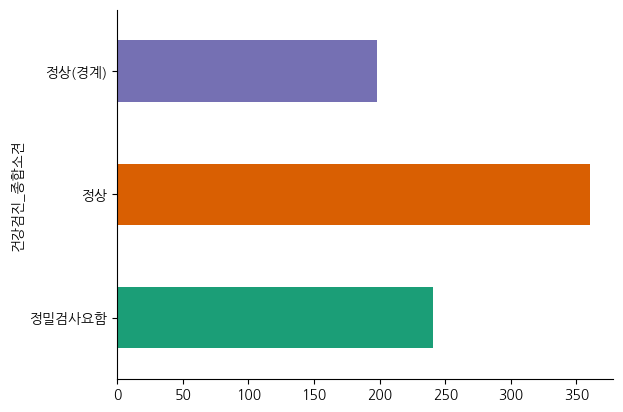

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
a.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

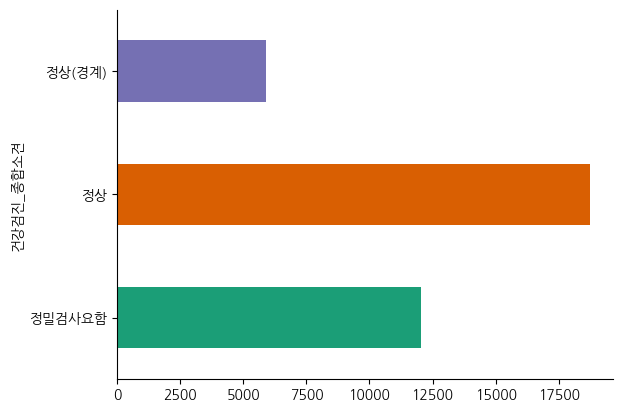

In [ ]:
# @title 건강검진_종합소견

from matplotlib import pyplot as plt
import seaborn as sns
b.groupby('건강검진_종합소견').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

봤을 때 표본 차이가 너무 큼

In [ ]:
a.groupby('시도').sum()

print(elementary.groupby('괴롭힘따돌림_초').sum())
print(elementary.groupby('현금갈취').sum())
print(elementary.groupby('체벌경험').sum())
print(elementary.groupby('신체접촉').sum())
print(elementary.groupby('무기력감').sum())
print(elementary.groupby('수업태도교정').sum())
print(elementary.groupby('가출생각_초').sum())
print(elementary.groupby('가족흡연').sum())
print(elementary.groupby('가족음주').sum())
print(elementary.groupby('가족지지').sum())
print(elementary.groupby('상담요청_초').sum())

<ipython-input-126-c1c547626837>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a.groupby('시도').sum()
<ipython-input-126-c1c547626837>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(elementary.groupby('괴롭힘따돌림_초').sum())
<ipython-input-126-c1c547626837>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(elementary.groupby('현금갈취').sum())
<ipython-input-126-c1c547626837>:5: FutureWarning: The default value of 

           현금갈취   체벌경험   신체접촉   무기력감  수업태도교정  가출생각_초   가족흡연   가족음주   가족지지  \
괴롭힘따돌림_초                                                                    
0             2      2      2      2       2       2      2      2      1   
1          1846   1755   1833   1781    1800    1761   1524   1627   1191   
2         72935  72350  72760  72522   71685   71876  59493  68583  40166   

          상담요청_초  
괴롭힘따돌림_초          
0              2  
1           1803  
2          72310  
      괴롭힘따돌림_초   체벌경험   신체접촉   무기력감  수업태도교정  가출생각_초   가족흡연   가족음주   가족지지  \
현금갈취                                                                       
0            0      0      0      0       0       0      0      0      0   
1          222    247    237    255     254     228    217    235    168   
2        73747  73860  74358  74050   73233   73411  60802  69977  41190   

      상담요청_초  
현금갈취          
0          0  
1        253  
2      73862  
      괴롭힘따돌림_초   현금갈취   신체접촉   무기력감  수업태도교정  가출생각_초   가족흡연   가족

<ipython-input-126-c1c547626837>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(elementary.groupby('가족흡연').sum())
<ipython-input-126-c1c547626837>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(elementary.groupby('가족음주').sum())
<ipython-input-126-c1c547626837>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(elementary.groupby('가족지지').sum())
<ipython-input-126-c1c547626837>:13: FutureWarning: The

In [ ]:
a, b= column_check(elementary,'가족흡연')
elementary2019.groupby('건강검진_종합소견').sum().to_string()
elementary2021.groupby('건강검진_종합소견').sum()
print(elementary2021.columns)
print(mid_high2021.columns)


e2021 = pd.get_dummies(elementary2021, drop_first=True)
e2021


NameError: name 'column_check' is not defined

In [ ]:
mid_high['가출생각_중고'].value_counts()

2    59154
1     2519
0     1507
Name: 가출생각_중고, dtype: int64